In [1]:
from fredapi import Fred
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# pd.set_option('display.max_columns', None)  # or use a specific number if you know the column count
# pd.set_option('display.max_rows', None)  # or use a specific number if you know the row count
pd.set_option('display.max_colwidth', None)  # or use a large number like 1000


plt.style.use('ggplot')

In [2]:
# Load environment variables from .env file
load_dotenv()

api_key = os.getenv('FRED_API_KEY')

# Create the FRED Object
fred = Fred(api_key= api_key)

In [28]:
# # Search Fred for economic data
# sp_search = fred.search('S&P', order_by = 'popularity')

[]

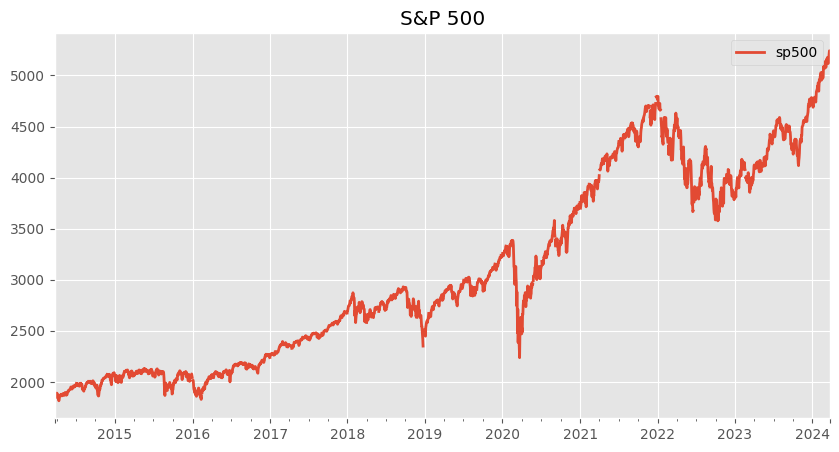

In [8]:
# Pull Raw Data 
# Fetch the SP500 index daily data
sp500 = fred.get_series(series_id='SP500')
sp500.name = ('sp500')
sp500_df = sp500.to_frame()

sp500_df.plot(figsize= (10,5), title = 'S&P 500', lw = 2)
plt.plot()

In [5]:
# sp500_df = sp500_df.reset_index()
# sp500_df = sp500_df.rename(columns = {'index': 'Date'})

## NULL HANDLING

In [9]:
sp500_df.isna().sum()

sp500    92
dtype: int64

In [51]:
# Update the sp500_df with the seasonal component
sp500_df = sp500_df.ffill()  # or method='ffill'

# Seasonal adjust the sp500_df
result = seasonal_decompose(sp500_df['sp500'], model='additive', period=365)

# Get the seasonal component
seasonal_component = result.seasonal

sp500_df['seasonal_adjusted'] = sp500_df['sp500'] - seasonal_component

sp500_df['sp500'] = sp500_df['seasonal_adjusted']
del sp500_df['seasonal_adjusted']

[]

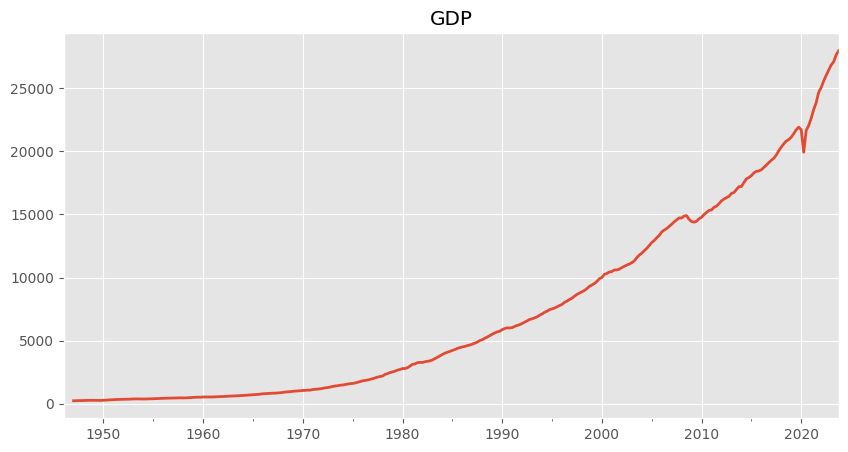

In [52]:
# Fetch the GDP index Quarterly data
gdp = fred.get_series('GDP')
gdp.name = ('gdp')

gdp_df = gdp.to_frame()

gdp.plot(figsize= (10,5), title = 'GDP', lw = 2)
plt.plot()

In [8]:
gdp_df = gdp_df.ffill()  # or method='ffill'

[]

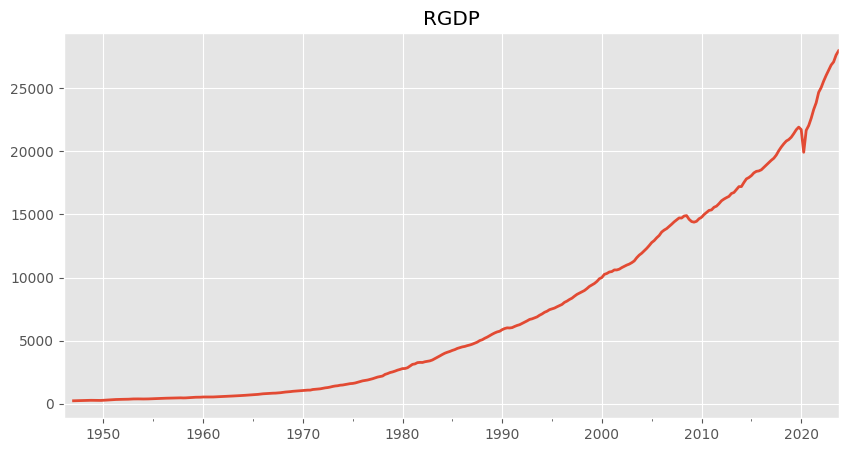

In [9]:
# Fetch the Real GDP index Quarterly data
real_gdp = fred.get_series('GDPC1')
real_gdp.name = ('rgdp')

real_gdp_df = real_gdp.to_frame()

gdp.plot(figsize= (10,5), title = 'RGDP', lw = 2)
plt.plot()


In [10]:
real_gdp_df = real_gdp_df.ffill()  # or method='ffill'

In [135]:
# # Data Info
# unemp_info = fred.search('unemployment')

# unemp_info.sort_values(by = 'popularity', ascending= False).iloc[:2]

# pd.DataFrame(unemp_info.sort_values(by = 'popularity', ascending= False).iloc[:2]).to_csv('filename.csv', index=True)

[]

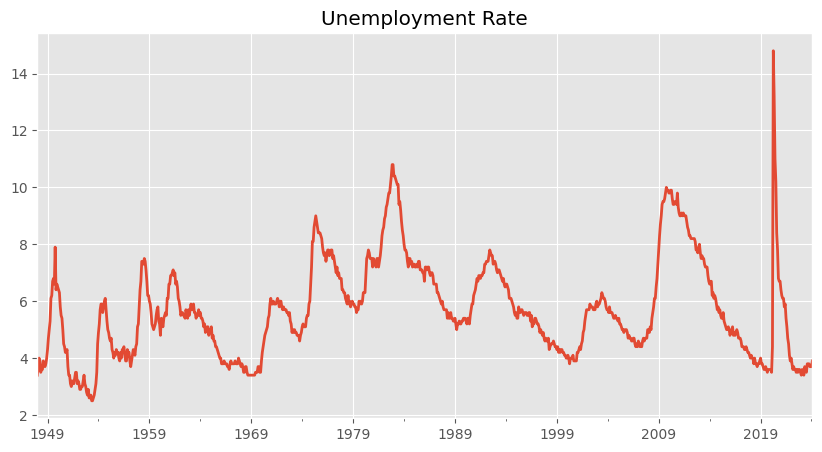

In [11]:
# Fetch the Unemployment rate Monthly data
unrate_df = fred.get_series(series_id= 'UNRATE')
unrate_df.name = ('unrate')

unrate_df_1 = unrate_df.to_frame()

unrate_df.plot(figsize= (10,5), title = 'Unemployment Rate', lw = 2)
plt.plot()

In [12]:
unrate_df_1 = unrate_df_1.ffill()  # or method='ffill'

[]

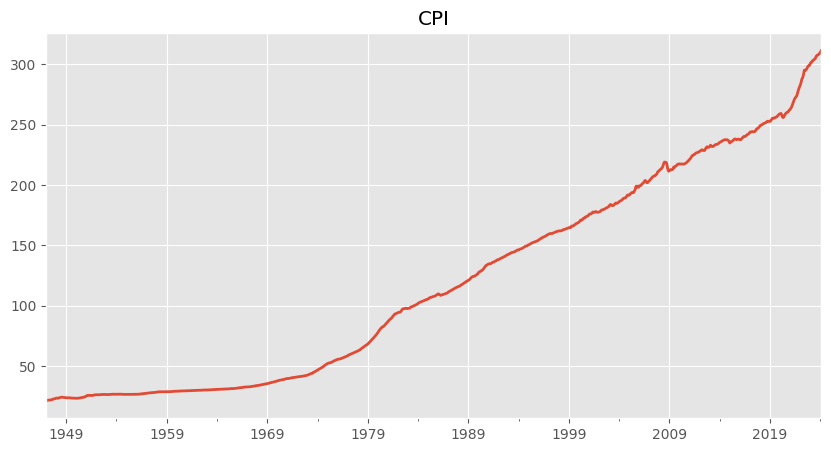

In [13]:
# Fetch the CPI Monthly data

cpi_df = fred.get_series(series_id= 'CPIAUCSL')
cpi_df.name = ('cpi')

cpi_df_1 = cpi_df.to_frame()

cpi_df.plot(figsize= (10,5), title = 'CPI', lw = 2)
plt.plot()

In [14]:
cpi_df_1 = cpi_df_1.ffill()  # or method='ffill'

In [117]:
# # Data Info
# cpi_df1 = fred.search('CPIAUCSL')

# cpi_df1.sort_values(by = 'popularity', ascending= False).iloc[:1]

# pd.DataFrame(cpi_df1.sort_values(by = 'popularity', ascending= False).iloc[:1]).to_csv('filename.csv', index=True)

[]

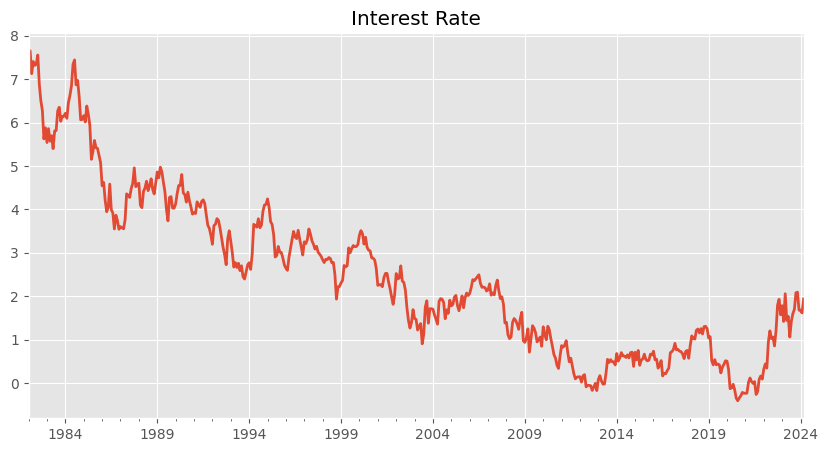

In [15]:
# Fetch the Interest rate Monthly data

int_df = fred.get_series(series_id= 'REAINTRATREARAT10Y')
int_df.name = ('interest_rates')

int_df_1 = int_df.to_frame()

int_df.plot(figsize= (10,5), title = 'Interest Rate', lw = 2)
plt.plot()

In [16]:
# Update the int_df_1 with the seasonal component
int_df_1 = int_df_1.ffill()

# Seasonal adjust the int_df_1
result = seasonal_decompose(int_df_1['interest_rates'].fillna(0), model='additive', period=12)

# Get the seasonal component
seasonal_component = result.seasonal

int_df_1['seasonal_adjusted'] = int_df_1['interest_rates'] - seasonal_component

int_df_1['interest_rates'] = int_df_1['seasonal_adjusted']
del int_df_1['seasonal_adjusted']

[]

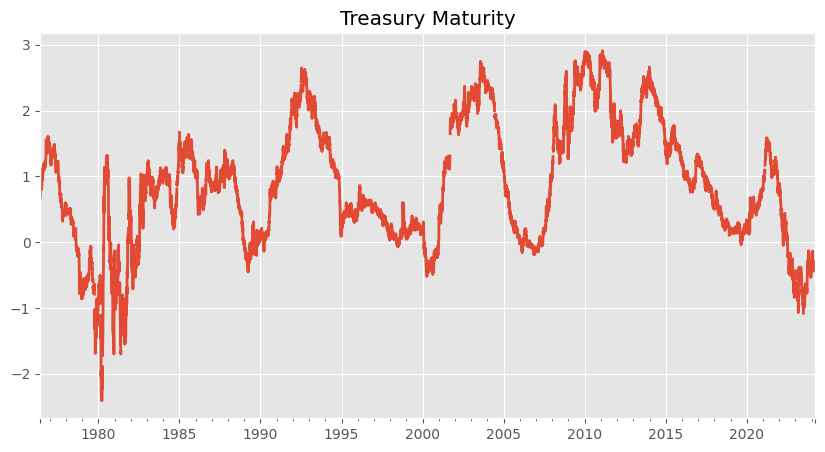

In [17]:
# Fetch the Treasury Maturity Monthly Data
treasure_df = fred.get_series(series_id= 'T10Y2Y')
treasure_df.name = ('treasure_maturity')

treasure_df_1 = treasure_df.to_frame()

treasure_df.plot(figsize= (10,5), title = 'Treasury Maturity', lw = 2)
plt.plot()

In [18]:
# Update the treasure_df_1 with the seasonal component
treasure_df_1 = treasure_df_1.ffill()

# Seasonal adjust the treasure_df_1
result = seasonal_decompose(treasure_df_1['treasure_maturity'].fillna(0), model='additive', period=365)

# Get the seasonal component
seasonal_component = result.seasonal

treasure_df_1['seasonal_adjusted'] = treasure_df_1['treasure_maturity'] - seasonal_component

treasure_df_1['treasure_maturity'] = treasure_df_1['seasonal_adjusted']
del treasure_df_1['seasonal_adjusted']

[]

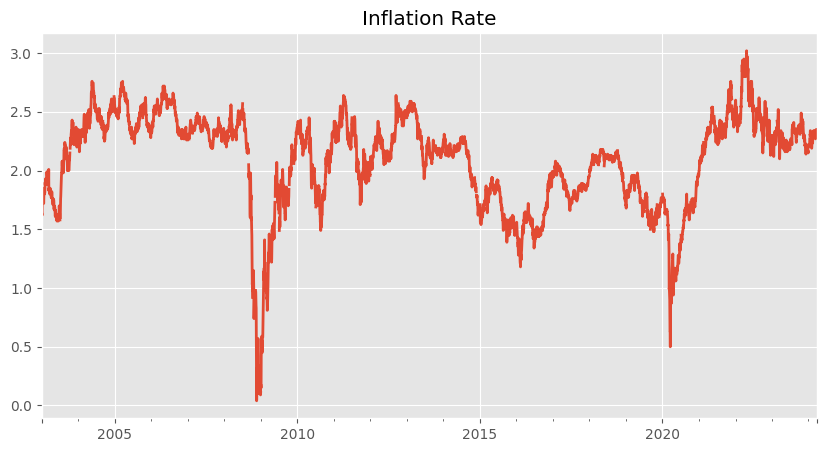

In [19]:
# Fetch the Treasury Maturity Monthly Data
inflation_df = fred.get_series(series_id= 'T10YIE')
inflation_df.name = ('inflation_rate')

inflation_df_1 = inflation_df.to_frame()

inflation_df.plot(figsize= (10,5), title = 'Inflation Rate', lw = 2)
plt.plot()


In [20]:
# Update the inflation_df_1 with the seasonal component
inflation_df_1 = inflation_df_1.ffill()

# Seasonal adjust the inflation_df_1
result = seasonal_decompose(inflation_df_1['inflation_rate'].fillna(0), model='additive', period=365)

# Get the seasonal component
seasonal_component = result.seasonal

inflation_df_1['seasonal_adjusted'] = inflation_df_1['inflation_rate'] - seasonal_component

inflation_df_1['inflation_rate'] = inflation_df_1['seasonal_adjusted']
del inflation_df_1['seasonal_adjusted']

[]

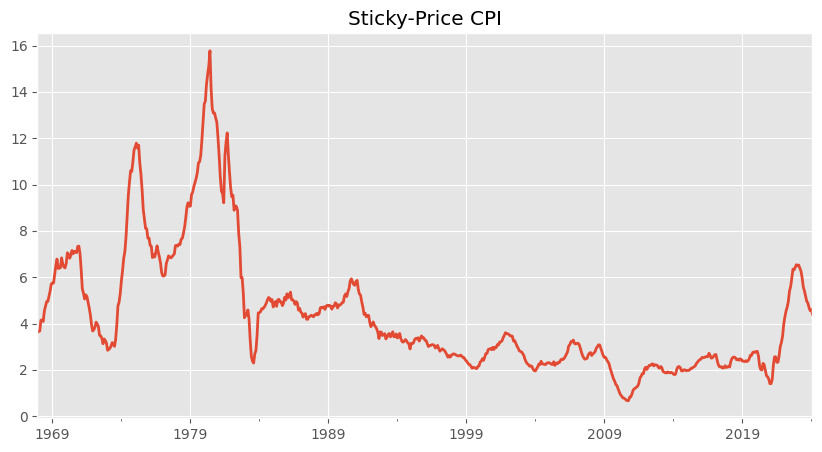

In [21]:
# Fetch the Sticky Price CPI Monthly Data
sticky_cpi_df = fred.get_series(series_id= 'CORESTICKM159SFRBATL')
sticky_cpi_df.name = ('sticky_cpi')

sticky_cpi_df_1 = sticky_cpi_df.to_frame()

sticky_cpi_df.plot(figsize= (10,5), title = 'Sticky-Price CPI', lw = 2)
plt.plot()


[]

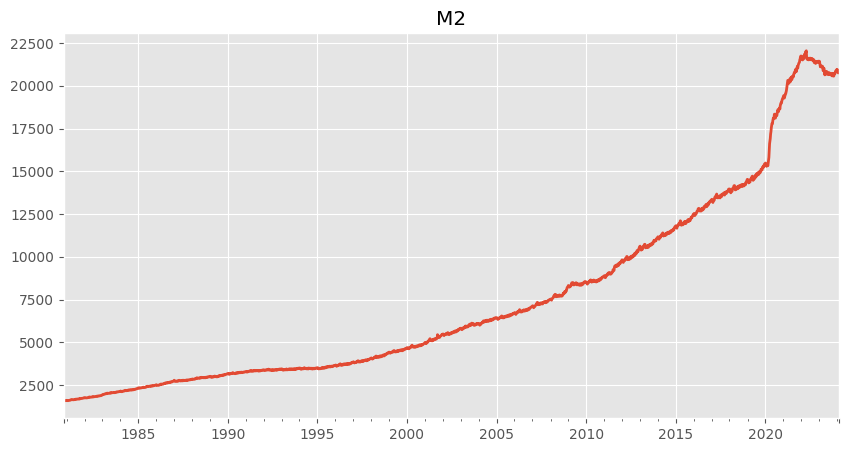

In [22]:
# Fetch the M2 Monthly Data
m2_df = fred.get_series(series_id= 'WM2NS')
m2_df.name = ('m2_money_stock')

m2_df_1 = m2_df.to_frame()

m2_df.plot(figsize= (10,5), title = 'M2', lw = 2)
plt.plot()

In [23]:
# Update the m2_df_1 with the seasonal component
m2_df_1 = m2_df_1.ffill()

# Seasonal adjust the m2_df_1
result = seasonal_decompose(m2_df_1['m2_money_stock'].fillna(0), model='additive', period=52)

# Get the seasonal component
seasonal_component = result.seasonal

m2_df_1['seasonal_adjusted'] = m2_df_1['m2_money_stock'] - seasonal_component

m2_df_1['m2_money_stock'] = m2_df_1['seasonal_adjusted']
del m2_df_1['seasonal_adjusted']

In [53]:
dataframes = [cpi_df_1, gdp_df, real_gdp_df, sp500_df, unrate_df_1, int_df_1, sticky_cpi_df_1, inflation_df_1]
merged_df = pd.concat(dataframes, axis=1)

In [56]:
merged_df = merged_df.reset_index()
merged_df = merged_df.rename(columns = {'index': 'Date'})


In [140]:
# # Data Info
# cpi_df1 = fred.search('WM2NS')

# cpi_df1.sort_values(by = 'popularity', ascending= False).iloc[:1]

# pd.DataFrame(cpi_df1.sort_values(by = 'popularity', ascending= False).iloc[:1]).to_csv('filename.csv', index=True)

In [51]:
### TEST

# unemp_df = fred.search('unemployment', filter= ('frequency', 'Monthly'), order_by= 'popularity')

# unemp_quer = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

# unemp_quer.loc[unemp_quer['title'].str.contains("Unemployment Rate")]